## HW2 | Use LSTM & CNN model to classify MNIST dataset with at least 90%
- 所有檔案: mnist_train_all.py
- 內容說明: 程式架構主要是參考助教提供在Github的程式碼，並針對LSTM與CNN的模型內容(hidden layer, convolution layer, pooling Layer)做了調整，訓練完模型後，觀察每一輪迭代所計算出的精確度。隨著迭代次數上升，此次訓練出的LSTM與CNN模型，精確度(val_accuracy)分別都有收斂至0.98與0.99。

### 0. Load the MNIST dataset

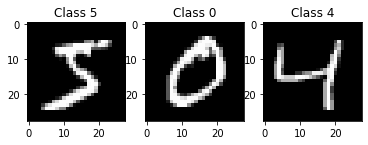

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show the image
plt.figure()
for index in [0, 1, 2]:
    plt.subplot(1, 3, index+1)
    plt.imshow(x_train[index], cmap="gray")
    plt.title("Class %s" %y_train[index])

### 1. CNN Model
#### Training
- Loss function: cross-entropy
- Optimizer: Adam
- Evaluation: accuracy

In [222]:
import keras
from sklearn.metrics import confusion_matrix
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import itertools

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.title("Train History")
    if train == 'accuracy':
        plt.legend([train, validation], loc='lower right', shadow=True)
    else:
        plt.legend([train, validation], loc='upper right', shadow=True)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

def cnn_preprocess(x_train, x_test, y_train, y_test):
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return (x_train, x_test, y_train, y_test)

def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
    model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
    model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
    model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    return model

def trainning(model, x_train, y_train, x_test, y_test, 
              learning_rate, training_iters, batch_size):
    adam = Adam(lr=learning_rate)
    model.summary()
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    train_history = model.fit(x_train, y_train,
              batch_size=batch_size, epochs=training_iters,
              verbose=1, validation_data=(x_test, y_test))
    return train_history
    
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def mnist_cnn_main():
    # training parameters
    learning_rate = 0.001
    training_iters = 10
    batch_size = 64

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test, y_train_o, y_test_o = cnn_preprocess(x_train, x_test, y_train, y_test)

    model = cnn_model()
    train_history = trainning(model, x_train, y_train_o, x_test, y_test_o, learning_rate, training_iters, batch_size)
    scores = model.evaluate(x_test, y_test_o, verbose=0)
    print('CNN test accuracy:', scores[1])
    
    # Plot training result with increasing epoch
    show_train_history(train_history, 'accuracy', 'val_accuracy')
    show_train_history(train_history, 'loss', 'val_loss')
    
    # Plot Confusion Matrix
    # get train & test predictions
    train_pred = model.predict_classes(x_train)
    test_pred = model.predict_classes(x_test)

    # confusion matrix
    train_result_cm = confusion_matrix(y_train, train_pred, labels=range(10))
    test_result_cm = confusion_matrix(y_test, test_pred, labels=range(10))

    plot_confusion_matrix(train_result_cm, range(0, 9))
    plot_confusion_matrix(test_result_cm, range(0, 9))


#### Result of CNN model
- iteration = 10
- Validation accuracy: 0.9945
- As the epoch increases, the accuracy of the model converges to 0.99
- Confusion Matrices of training and testing results

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 7, 7, 64)        

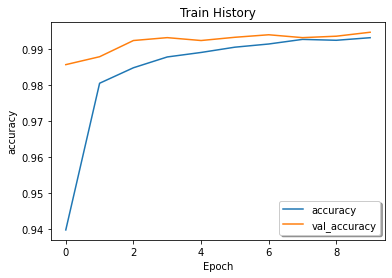

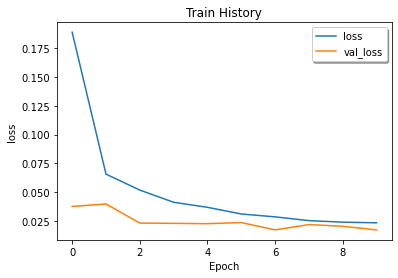

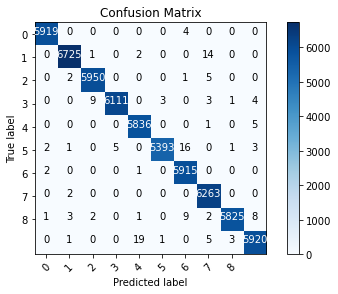

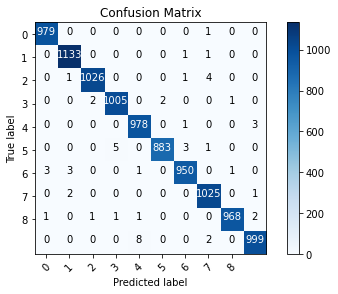

In [160]:
mnist_cnn_main()

### Observe error recognition results
- 觀察模型中predict錯誤的情況

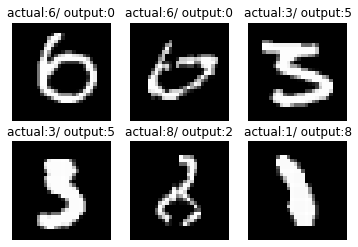

In [161]:
incorrect = np.where(y_test != test_pred)[0]
test_set = np.squeeze(x_test, axis=3)

for i in range(6):
    plt.subplot(2, 3, i+1)
    idx = incorrect[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.title("actual:{}/ output:{}".format(y_test[idx], test_pred[idx]))


### 2. LSTM Model
#### Training
- Loss function: cross-entropy
- Optimizer: Adam
- Evaluation: accuracy

In [229]:
import keras
from keras.layers import LSTM

def lstm_preprocess(x_train, x_test, y_train, y_test, n_step, n_input, n_classes):
    x_train = x_train.reshape(-1, n_step, n_input)
    x_test = x_test.reshape(-1, n_step, n_input)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    y_train = keras.utils.to_categorical(y_train, n_classes)
    y_test = keras.utils.to_categorical(y_test, n_classes)
    return (x_train, x_test, y_train, y_test)


def lstm_model(n_input, n_step, n_hidden, n_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

def trainning(model, x_train, y_train, x_test, y_test, 
              learning_rate, training_iters, batch_size):
    adam = Adam(lr=learning_rate)
    model.summary()
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    train_history = model.fit(x_train, y_train,
              batch_size=batch_size, epochs=training_iters,
              verbose=1, validation_data=(x_test, y_test))
    return train_history

def mnist_lstm_main():
    # training parameters
    learning_rate = 0.001
    training_iters = 10
    batch_size = 128

    # model parameters
    n_input = 28
    n_step = 28
    n_hidden = 256
    n_classes = 10

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test, y_train_o, y_test_o = lstm_preprocess(x_train, x_test, y_train, y_test, n_step, n_input, n_classes)

    model = lstm_model(n_input, n_step, n_hidden, n_classes)
    train_history = trainning(model, x_train, y_train_o, x_test, y_test_o, learning_rate, training_iters, batch_size)
    scores = model.evaluate(x_test, y_test_o, verbose=0)
    print('LSTM test accuracy:', scores[1])
    
    # Plot training result with increasing epoch
    show_train_history(train_history, 'accuracy', 'val_accuracy')
    show_train_history(train_history, 'loss', 'val_loss')
    
    # Plot Confusion Matrix
    # get train & test predictions
    train_pred = model.predict_classes(x_train)
    test_pred = model.predict_classes(x_test)

    # confusion matrix
    train_result_cm = confusion_matrix(y_train, train_pred, labels=range(10))
    test_result_cm = confusion_matrix(y_test, test_pred, labels=range(10))

    plot_confusion_matrix(train_result_cm, range(0, 9))
    plot_confusion_matrix(test_result_cm, range(0, 9))


#### Result of LSTM model
- iteration = 10
- Validation accuracy: 0.9849
- As the epoch increases, the accuracy of the model converges to 0.98
- Confusion Matrices of training and testing results

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 28, 128)           80384     
_________________________________________________________________
dropout_57 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_58 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 32)                4128      
_________________________________________________________________
dropout_59 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 10)              

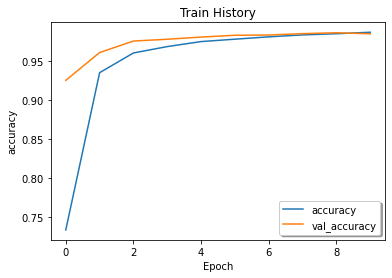

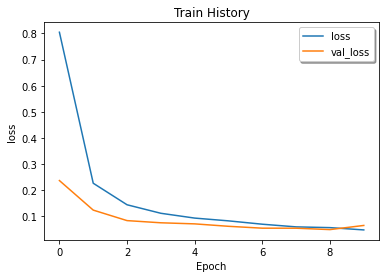

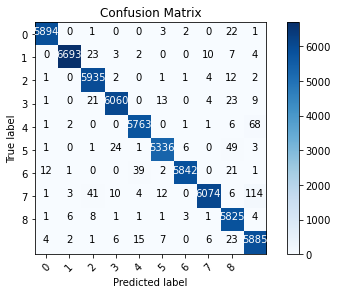

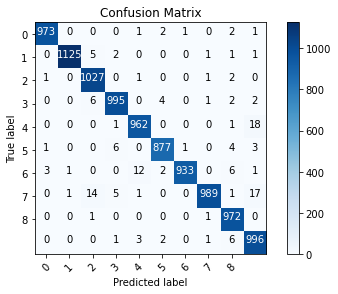

In [230]:
mnist_lstm_main()

### Reference
- [FinTech_CommonWealth_Magazine](https://github.com/pecu/FinTech_CommonWealth_Magazine/blob/master/Financial_Innovation/FiancailVision/HW2_ID_%E5%A7%93%E5%90%8D/Demo_HW2_%E5%AD%B8%E8%99%9F_%E5%A7%93%E5%90%8D.ipynb)
- [MNIST手寫數字識別](https://kknews.cc/zh-tw/code/avkrx8n.html)
- [改善CNN辨識率](https://medium.com/@syshen/%E6%94%B9%E5%96%84-cnn-%E8%BE%A8%E8%AD%98%E7%8E%87-dac9fce59b63)